In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('post.csv')

In [3]:
df.head()
df.shape

(20096, 9)

In [4]:
df.dropna(inplace=True)
df['likes'].isna().sum()
df.reset_index(inplace=True)

In [5]:
data = df[['msg','likes']]

In [6]:
import re
def preprocessor(text):
    text = re.sub('\{[^\{]*\}', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = (re.sub('[\W]+', ' ', text.lower()) +' '.join(emoticons).replace('-', ''))
    return text

In [7]:
text = "I need wildlife advice. I saw a fox in my backyard nursing her pups. It sounds precious{COMMA} but they were right next to my kids{APOST} swing set. If she was nursing{COMMA} does that mean there{APOST}s a den nearby? And if so{COMMA} should I be concerned about the safety of my 2 and 3 year olds?"

In [8]:
re.sub('\{[^\{]*\}', '', text)

'I need wildlife advice. I saw a fox in my backyard nursing her pups. It sounds precious but they were right next to my kids swing set. If she was nursing does that mean theres a den nearby? And if so should I be concerned about the safety of my 2 and 3 year olds?'

In [9]:
print("before preprocessing \n" , data['msg'][0])
print("after preprocessing \n" , preprocessor(data['msg'][0]))

before preprocessing 
 EP hive mind: can you recommend a good dermatologist?
after preprocessing 
 ep hive mind can you recommend a good dermatologist 


In [10]:
def tokenizer(text):
    return text.split()

In [11]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer('a runner likes running and runs a lot')[-10:] if w not in stop]

['runner', 'likes', 'running', 'runs', 'lot']

In [12]:
def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv)  # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

In [13]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer


count = CountVectorizer(stop_words='english',
                        max_df=.1,
                        max_features=5000)

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                       stop_words=stop,
                       preprocessor=preprocessor)

# Hvect = HashingVectorizer(decode_error='ignore', 
#                          n_features=2**21,
#                          preprocessor=None, 
#                          tokenizer=tokenizer)

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', RandomForestClassifier())])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['msg'], data['likes'], test_size=0.2, random_state=0)

In [16]:
lr_tfidf.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(lowercase=False,
                                 preprocessor=<function preprocessor at 0x000001D4C13204C0>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('clf', RandomForestClassifier())])

In [22]:
print("train score = ",lr_tfidf.score(X_train , y_train))
print("test score = ",lr_tfidf.score(X_test , y_test))

train score =  0.9555132421672148
test score =  0.27137417791623397


In [18]:
from prettytable import PrettyTable

until_n = 40;
table = PrettyTable()
table.field_names = ["Actual",'predicted']
a_y_test = y_test[:until_n]
b_y_test = lr_tfidf.predict(X_test[:until_n])

for i in range(until_n):
    table.add_row([a_y_test.iloc[i],b_y_test[i]])

print(table)

+--------+-----------+
| Actual | predicted |
+--------+-----------+
|  7.0   |    2.0    |
|  1.0   |    1.0    |
|  1.0   |    2.0    |
|  3.0   |    1.0    |
|  16.0  |    1.0    |
|  1.0   |    2.0    |
|  1.0   |    1.0    |
|  3.0   |    1.0    |
|  27.0  |    1.0    |
|  4.0   |    1.0    |
|  5.0   |    1.0    |
|  1.0   |    1.0    |
|  1.0   |    1.0    |
|  2.0   |    1.0    |
|  3.0   |    1.0    |
|  3.0   |    5.0    |
|  1.0   |    1.0    |
|  3.0   |    1.0    |
|  1.0   |    3.0    |
|  1.0   |    1.0    |
|  2.0   |    1.0    |
|  2.0   |    1.0    |
|  6.0   |    6.0    |
|  8.0   |    1.0    |
|  17.0  |    2.0    |
|  2.0   |    1.0    |
|  1.0   |    1.0    |
|  11.0  |    1.0    |
|  78.0  |    44.0   |
|  1.0   |    1.0    |
|  1.0   |    1.0    |
|  7.0   |    1.0    |
|  1.0   |    1.0    |
|  2.0   |    1.0    |
|  18.0  |    14.0   |
|  45.0  |    1.0    |
|  34.0  |    3.0    |
|  4.0   |    2.0    |
|  27.0  |    3.0    |
|  2.0   |    1.0    |
+--------+-

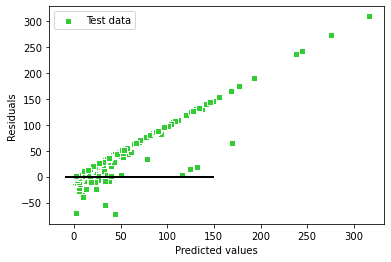

In [30]:
y_test_pred = lr_tfidf.predict(X_test)
plt.scatter(y_test,y_test-y_test_pred ,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=150, color='black', lw=2)
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt


class ResidualPlot:

    def __init__(self, y, pred_y):
        self.__y = np.array(y)
        self.__predicted_y = np.array(pred_y)
        self.__residual = self.__predicted_y - self.__y
        self.__residual2 = self.__y - self.__predicted_y

    def draw(self):
        plt.figure(np.random.randint(2000))
        plt.scatter(self.__predicted_y, self.__predicted_y - self.__y)
        plt.axhline(0, color='red')
        plt.xlabel("Y Hat")
        plt.ylabel("Residua")
        plt.show()

    def draw2(self):
        plt.figure(np.random.randint(2000))
        plt.scatter(self.__y, self.__y - self.__predicted_y)
        plt.axhline(0, color='red')
        plt.xlabel("Y")
        plt.ylabel("Residua")
        plt.show()


res = ResidualPlot(y=y_test ,pred_y=lr_tfidf.predict(X_test))


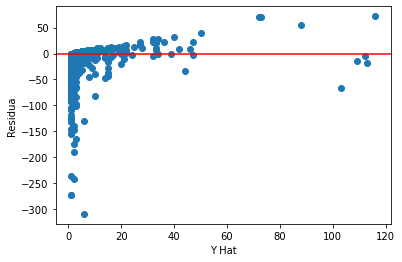

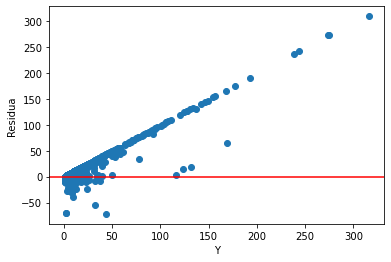

In [41]:
res.draw()
res.draw2()


In [21]:
y_train.all()

True